<font size = 5>**LAB 13**</font>

1) Create the following data and write to a csv file: Generate 10 random points in each of the the following circles (i) centre at (3,3) and radius 2, (ii) centre at (7,7) and radius 2 (iii) centre at (11,11) and radius 2.  Plot the data as well.                     (2 marks)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
help(np.random.random)

np.random.seed(25)

#Below generates a point given centre (x,y) and radius
#I am looping so that the points are generated with uniform distribution across the circle

def gen_circle_point(x,y,r):
    while(True):
        x1 = np.random.uniform(-r,r)
        y1 = np.random.uniform(-r,r)
        if(x1**2 + y1**2 < r**2):
            return list([x+x1,y+y1])
    

#Below generates OUR required data 
def gen_data():
    lst = []
    for i in range(10):
        lst.append(gen_circle_point(3,3,2))
    for i in range(10):
        lst.append(gen_circle_point(7,7,2))
    for i in range(10):
        lst.append(gen_circle_point(11,11,2))
    df = pd.DataFrame(lst,columns=["x","y"])
    df.to_csv("data.csv")
    
gen_data()

Help on built-in function random:

random(...) method of numpy.random.mtrand.RandomState instance
    random(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0). Alias for
    `random_sample` to ease forward-porting to the new random API.



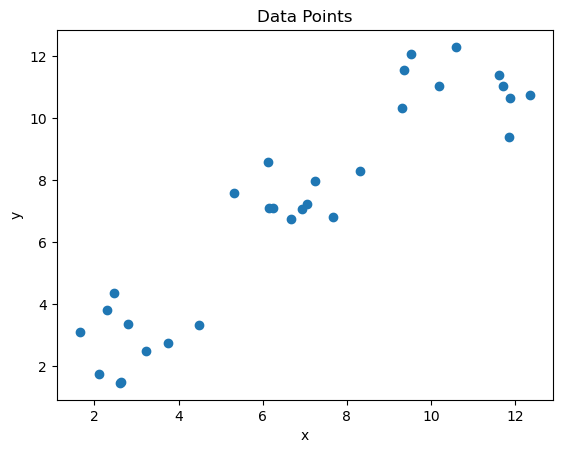

In [3]:
#The plot of data points

df = pd.read_csv("data.csv",usecols = ["x","y"])
plt.scatter(list(df["x"]),list(df["y"]))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points")
plt.show()


2)  Implement K - means clustering algorithm and for the above data, show the change in the centroid as well as the class assignments. Also, plot the cost function for K varying from 1 to 5. Show that the value of K matches with the intuition from the data. Plot the K-classes for the final K-value.      (8 marks)


In [4]:

class kmeans():
    def __init__(self,x,y):
        self.x = x
        self.y = y
        
    #Cost function for given centroids and labels , the x and y values are in the class instance
    def cost(self,centroids,labels):
        J = 0
        for i in range(len(self.x)):
            J = J + (centroids[labels[i]][0]-self.x[i])**2 + (centroids[labels[i]][1]-self.y[i])**2
        return J
    
    #Below function returns random centroids given some x,y ranges
    def random_centroids(self,x1,x2,y1,y2,k):
        lst = np.tile(np.zeros(2),(k,1))
        #print(lst.shape)
        for i in range(k):
            lst[i] = np.array([np.random.uniform(x1,x2),np.random.uniform(y1,y2)])
        return lst
    
    #Below function finds the next centroids given the curent centroids and label and k
    
    def find_centroids(self,centroids,labels,k):
        freq = np.zeros(k)
        new_centroids = np.tile(np.zeros(2),(k,1))
        
        #For each label we find the sum of the x coords and y coords
        for i in range(len(labels)):
            freq[labels[i]] = freq[labels[i]] + 1
            new_centroids[labels[i],0] = new_centroids[labels[i],0] + self.x[i]
            new_centroids[labels[i],1] = new_centroids[labels[i],1] + self.y[i]
            
        #If some centroid DOES NOT have any closest points we just dont update it
        #Else we take it to be the mean of its closest points
        for i in range(k):
            if(freq[i] == 0):
                new_centroids[i] = centroids[i,:]
            else:
                new_centroids[i,0] = new_centroids[i,0]/freq[i]
                new_centroids[i,1] = new_centroids[i,1]/freq[i]
                
        return new_centroids
    
    def cluster(self,k):
        labels = np.array([0]*len(self.x))
        centroids = self.random_centroids(0,15,0,15,k)
        centroid_history = [centroids]
        
        #To find the current closest points
        
        for iteration in range(100): #Setting max iterations as 100 here
            
            #Find the min distance centroid for every point and set up in labels
            for i in range(len(self.x)):
                for j in range(len(centroids)):
    
                    mindist = (centroids[labels[i],0]-self.x[i])**2 + (centroids[labels[i],1]-self.y[i])**2
                    newdist = (centroids[j,0]-self.x[i])**2 + (centroids[j,1]-self.y[i])**2
                
                    if(newdist < mindist):
                        labels[i] = j
                        mindist = newdist
            
            new_centroids = self.find_centroids(centroids,labels,k)
            #Check if there is no change in the centroids -- break if no change now
            nochange = True
            for i in range(k):
                for j in range(2):
                    if(abs(new_centroids[i,j]-centroids[i,j]) > 1e-3):
                        nochange = False
            
            if(nochange):
                break
            
            centroids = new_centroids
            centroid_history.append(centroids)
                
        
        return centroids,centroid_history,labels,self.cost(centroids,labels)
        

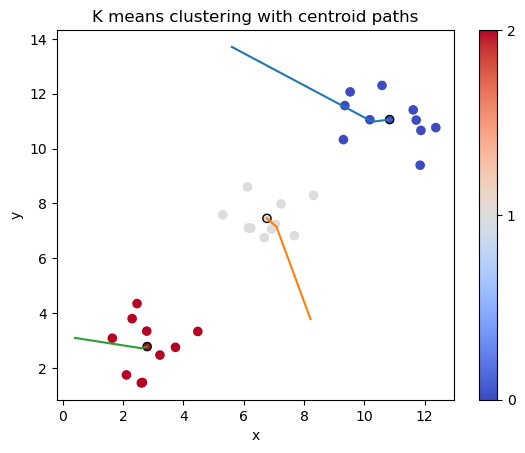

As you can see we have done 3 clustering
The colours represent the different class assignments
The centroids are marked with a black outline
The centroid paths are also drawn


In [5]:
#For K = 3

#Create model instance
model = kmeans(np.array(df["x"]),np.array(df["y"]))

'''As mentionned in class we run the model multiple times and 
take the one with the least loss'''

centroids,cen_hist,labels,cost = model.cluster(3)
for i in range(40):
    centroids1,cen_hist1,labels1,cur_cost = model.cluster(3)
    if(cur_cost < cost):
        cost = cur_cost
        centroids = centroids1
        cen_hist = cen_hist1
        labels = labels1


centroids = np.array(centroids).T
cen_hist = np.array(cen_hist)

# Create a scatter plot

plt.scatter(list(df["x"]), list(df["y"]), c=labels,cmap = plt.get_cmap('coolwarm'),s=35,vmin=0, vmax=2)
plt.scatter(centroids[0],centroids[1],c=[0,1,2],edgecolors="black",marker = "o",cmap = plt.get_cmap('coolwarm'),s=35,vmin=0, vmax=2)

#add colorbar
cb = plt.colorbar()
cb.set_ticks(np.arange(0, 3))

#Plot the centroid paths below
linex1 = cen_hist[:,0,0]
liney1 = cen_hist[:,0,1]
plt.plot(linex1,liney1)

linex2 = cen_hist[:,1,0]
liney2 = cen_hist[:,1,1]
plt.plot(linex2,liney2)

linex3 = cen_hist[:,2,0]
liney3 = cen_hist[:,2,1]
plt.plot(linex3,liney3)

plt.xlabel("x")
plt.ylabel("y")
plt.title("K means clustering with centroid paths")
plt.show()

print('''As you can see we have done 3 clustering
The colours represent the different class assignments
The centroids are marked with a black outline
The centroid paths are also drawn''')

We can see that the elbow comes at k = 3


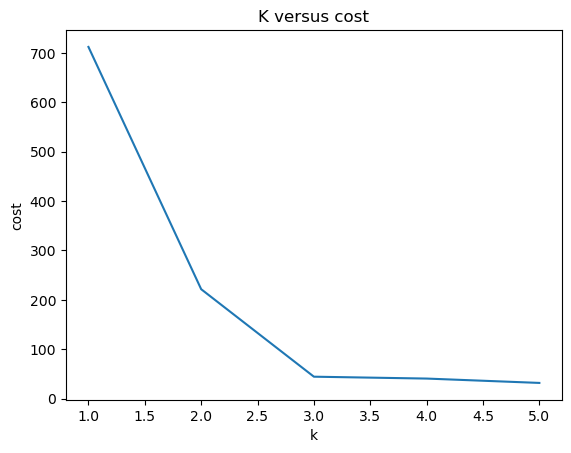

In [7]:
#Creating model
model = kmeans(np.array(df["x"]),np.array(df["y"]))

#List to store the k versus cost
k_vs_cost = []

#List to store the k values
kvals = []

#For each k value we find the minimum cost attained
for j in range(1,6):
    mincost = 1e20
    for i in range(50):
        centroids,cen_hist,labels,cost = model.cluster(j)
        if(cost < mincost):
            mincost = cost
    #Append the minimum cost
    k_vs_cost.append(cost)
    kvals.append(j)
    
#Plot the k versus cost graph
plt.plot(kvals,k_vs_cost)
plt.xlabel("k")
plt.ylabel("cost")
plt.title("K versus cost")

print('''We can see that the elbow comes at k = 3''')
plt.show()

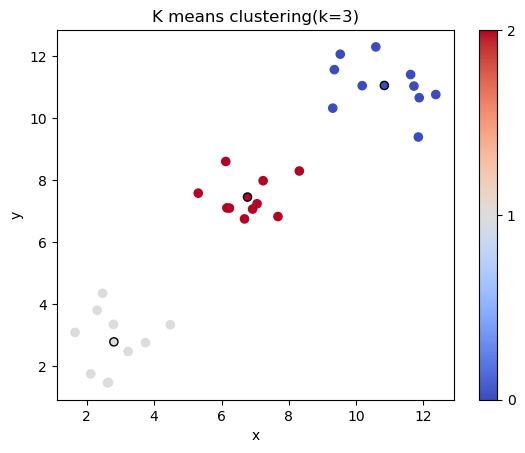

In [8]:
#Final clustering with k = 3

#Find the best k = 3 clustering among 41 trials
centroids,cen_hist,labels,cost = model.cluster(3)
for i in range(40):
    centroids1,cen_hist1,labels1,cur_cost = model.cluster(3)
    if(cur_cost < cost):
        cost = cur_cost
        centroids = centroids1
        cen_hist = cen_hist1
        labels = labels1


centroids = np.array(centroids).T

# Create a scatter plot

plt.scatter(list(df["x"]), list(df["y"]), c=labels,cmap = plt.get_cmap('coolwarm'),s=35,vmin=0, vmax=2)
plt.scatter(centroids[0],centroids[1],c=[0,1,2],edgecolors="black",marker = "o",cmap = plt.get_cmap('coolwarm'),s=35,vmin=0, vmax=2)

#Add a colorbar
cb = plt.colorbar()
cb.set_ticks(np.arange(0, 3))

plt.xlabel("x")
plt.ylabel("y")
plt.title("K means clustering(k=3)")
plt.show()
